In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pmdarima.arima import auto_arima

# Load the dataset
data = pd.read_csv('data.csv')

# Assuming we want to work with our country Morocco
country_data = data[data['Country_Region'] == 'Morocco']

# Extract the date and ConfirmedCases columns
dates = pd.to_datetime(country_data['Date'])
cases = country_data['ConfirmedCases']

# Create a time series object
ts = pd.Series(cases.values, index=dates)


# Perform the ADF test
result = sm.tsa.adfuller(ts, autolag='AIC')

# Extract and print the results
adf_statistic, p_value, used_lag, n_obs, critical_values, icbest = result
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'Used Lag: {used_lag}')
# print(f'Number of Observations: {n_obs}')
# print('Critical Values:')

# for key, value in critical_values.items():
#     print(f'   {key}: {value}')
    
# Interpret the results
if p_value <= 0.05:
    print("Reject the null hypothesis: The data is stationary.")
else:
    print("Fail to reject the null hypothesis: The data is non-stationary.")


# Initialize variables
max_differences = 2  # Maximum number of differences to attempt
d = 0  # Initialize the differencing order

# Perform ADF test with increasing differences
while d < max_differences:
    result = sm.tsa.adfuller(ts.diff(d+1).dropna(), autolag='AIC')
    adf_statistic, p_value, _, _, _, _ = result
    
    # Check if the data is stationary based on p-value
    if p_value <= 0.05:
        print(f'Differencing order required (recommended d): {d}')
        break
    
    d += 1

# If the loop completes without finding a stationary series
if d == max_differences:
    print("Maximum differencing attempted. The series may still be non-stationary.")


# auto = auto_arima(ts, seasonal=False, stepwise=True, suppress_warnings=True, error_action="ignore")
# best_p, best_d, best_q = auto.order

# print(f"Recommended p: {best_p}")
# print(f"Recommended d: {best_d}")
# print(f"Recommended q: {best_q}")

ADF Statistic: -3.7849831079340133
p-value: 0.0030647489631667247
Used Lag: 11
Reject the null hypothesis: The data is stationary.
Differencing order required (recommended d): 0


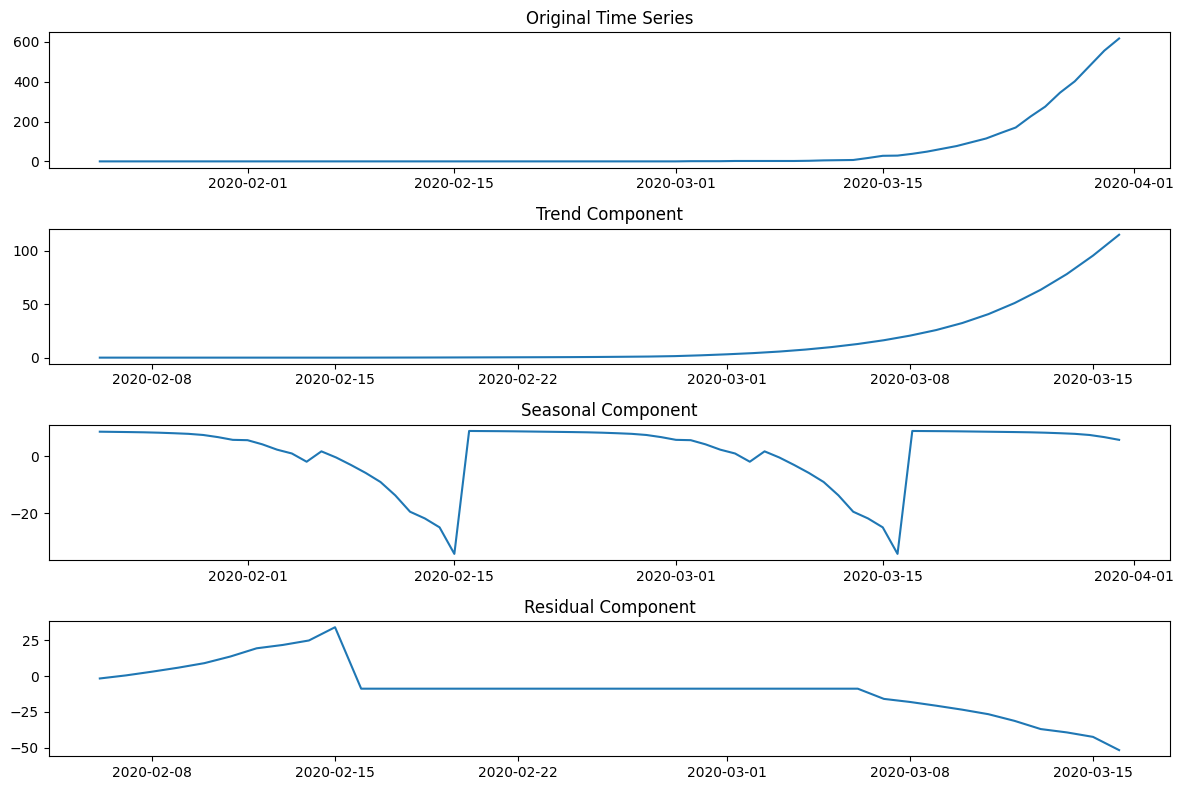

In [145]:
decomposition = sm.tsa.seasonal_decompose(ts, model='additive', period=30)  # Assuming monthly seasonality

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(ts, label='Original')
plt.title('Original Time Series')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.title('Trend Component')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.title('Residual Component')
plt.tight_layout()
plt.show()


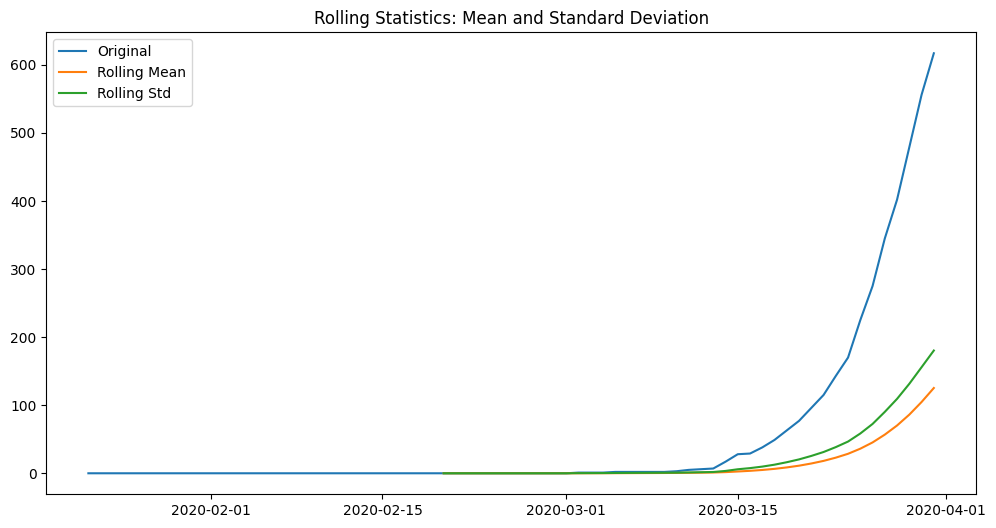

In [146]:
# Plot rolling statistics
rolling_mean = ts.rolling(window=30).mean()
rolling_std = ts.rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend()
plt.title('Rolling Statistics: Mean and Standard Deviation')
plt.show()



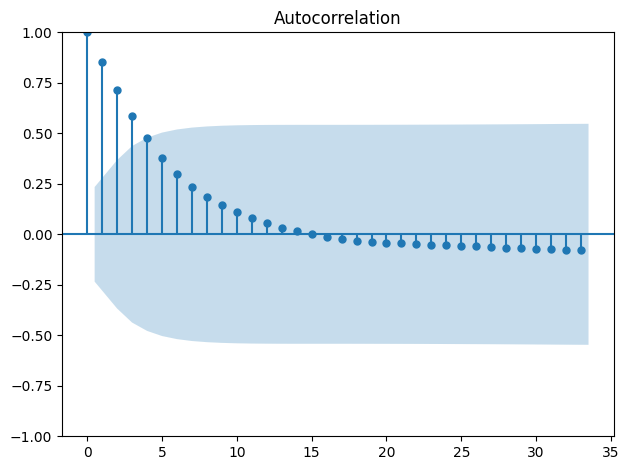

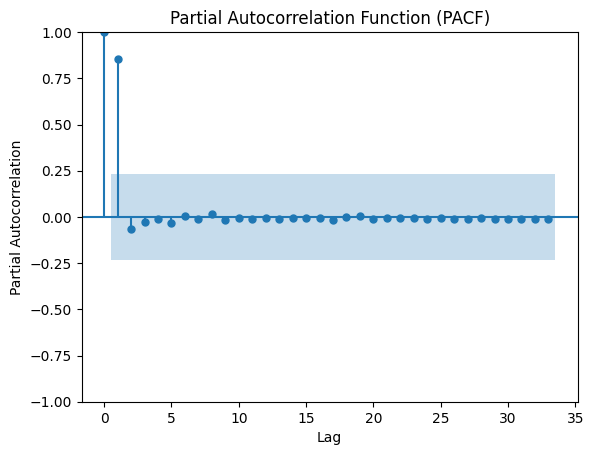

In [147]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot ACF 
sm.graphics.tsa.plot_acf(ts, lags=33)

plt.tight_layout()
plt.show()

plot_pacf(ts, lags=33)  # Adjust the number of lags as needed

plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')

plt.show()


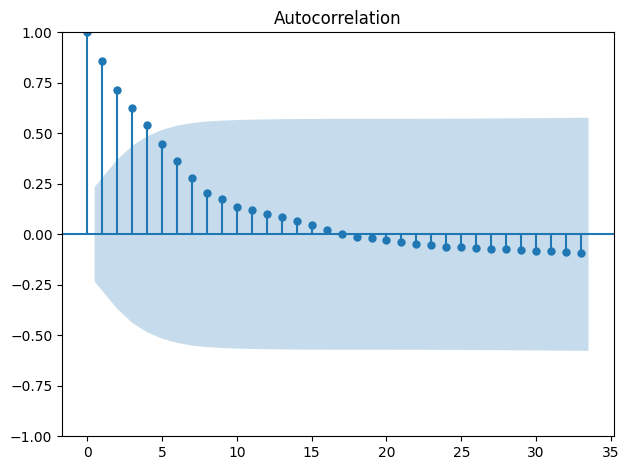

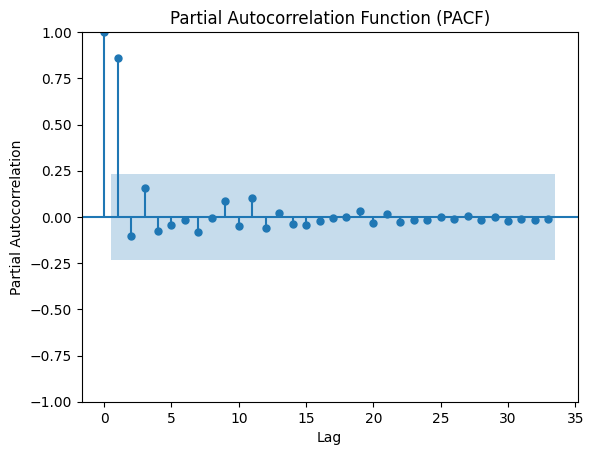

C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\lenovo\AppData\Roaming\Python\Python311\site-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   70
Model:                ARIMA(3, 1, 12)   Log Likelihood                -203.218
Date:                Mon, 02 Oct 2023   AIC                            438.437
Time:                        13:53:46   BIC                            474.182
Sample:                    01-22-2020   HQIC                           452.618
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1613     19.914     -0.008      0.994     -39.193      38.870
ar.L2          0.9472      0.806      1.175      0.240      -0.633       2.528
ar.L3          0.1417     18.675      0.008      0.9

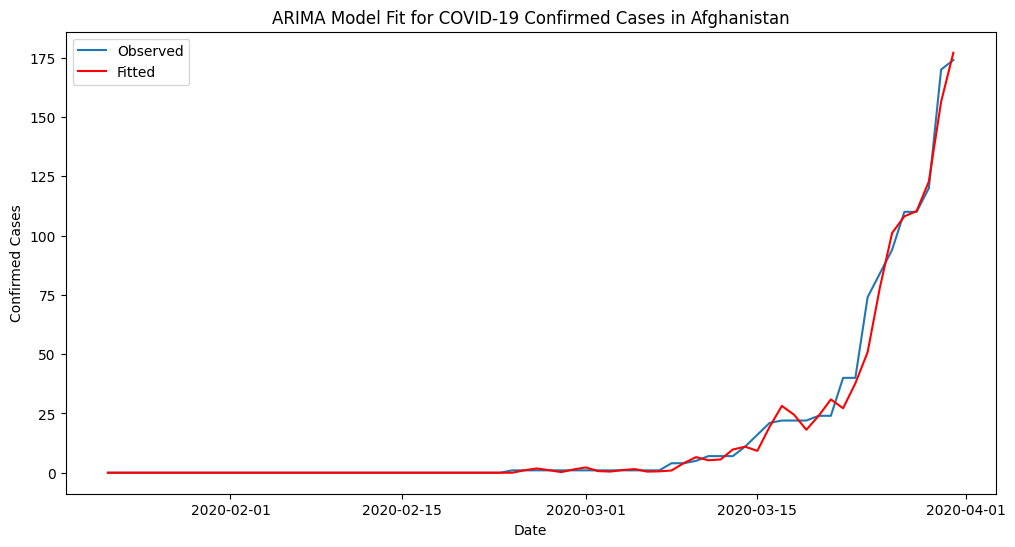

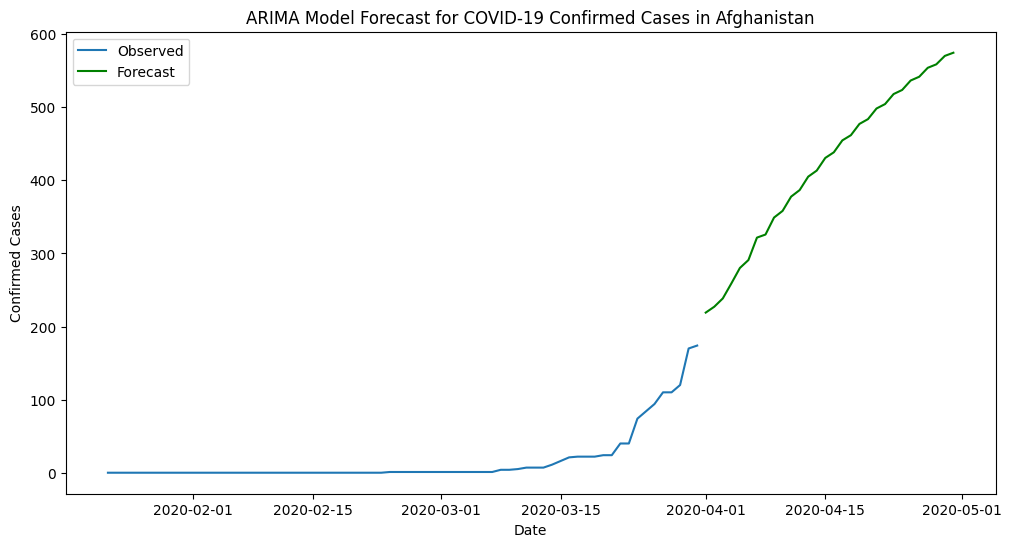

C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\lenovo\AppData\Roaming\Python\Python311\site-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   70
Model:                ARIMA(3, 1, 13)   Log Likelihood                -197.097
Date:                Mon, 02 Oct 2023   AIC                            428.194
Time:                        13:53:48   BIC                            466.174
Sample:                    01-22-2020   HQIC                           443.262
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0364     34.418     -0.001      0.999     -67.495      67.422
ar.L2          0.7303     13.288      0.055      0.956     -25.314      26.774
ar.L3         -0.1197     26.541     -0.005      0.9

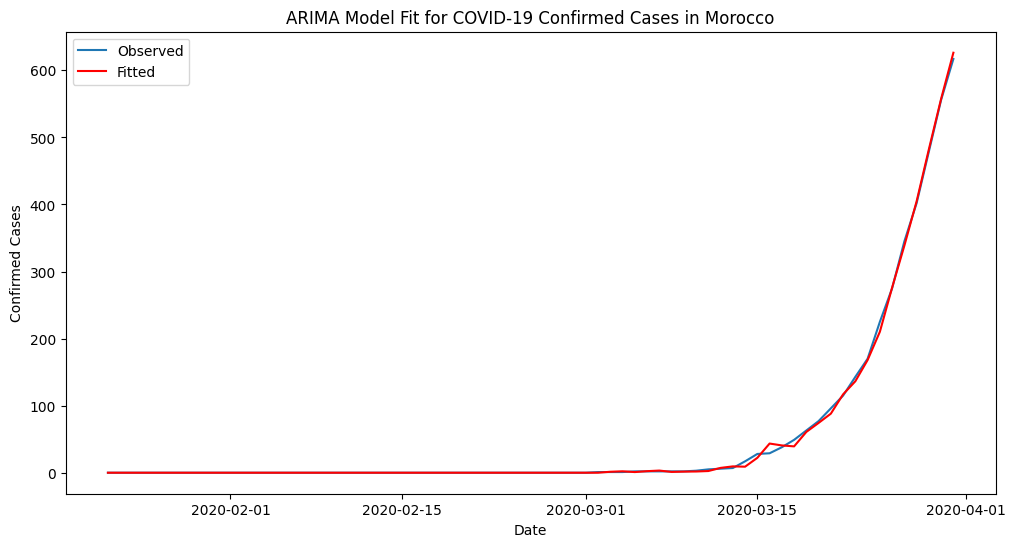

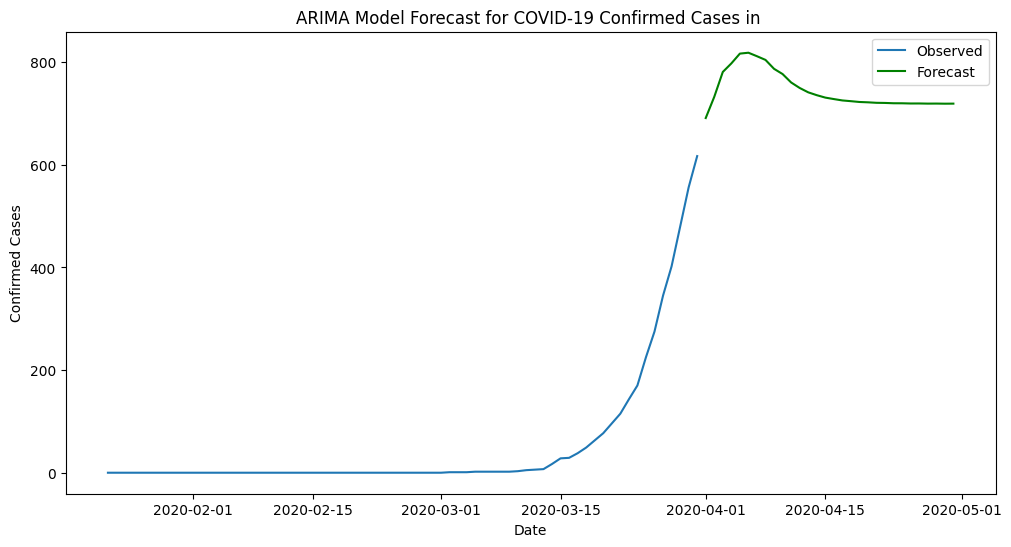

In [148]:

from statsmodels.tsa.arima.model import ARIMA

# Load the dataset and prepare the time series
data = pd.read_csv('data.csv')

country_data = data[data['Country_Region'] == 'Afghanistan']

# Extract the date and ConfirmedCases columns
dates = pd.to_datetime(country_data['Date'])
cases = country_data['ConfirmedCases']

# Create a time series object
ts = pd.Series(cases.values, index=dates)

from statsmodels.graphics.tsaplots import plot_pacf

# ACF and PACF for Afghanistan
# Plot ACF 
sm.graphics.tsa.plot_acf(ts, lags=33)

plt.tight_layout()
plt.show()


plot_pacf(ts, lags=33)  # Adjust the number of lags as needed

# plot PACF 
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')

plt.show()



# Fit an ARIMA model
p = 3  # Autoregressive (AR) order
d = 1  # Integrated (I) 
q = 12  # Moving Average (MA) order

model = ARIMA(ts, order=(p, d, q))
results = model.fit()

# Print model summary
print(results.summary())

# Plot model predictions
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Observed')
plt.plot(results.fittedvalues, color='red', label='Fitted')
plt.title('ARIMA Model Fit for COVID-19 Confirmed Cases in Afghanistan')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

# Forecast future values
forecast_steps = 30  
forecast = results.forecast(steps=forecast_steps)

# Generate future dates
future_dates = pd.date_range(start=dates.max() + pd.DateOffset(1), periods=forecast_steps)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Observed')
plt.plot(future_dates, forecast, color='green', label='Forecast')
plt.title('ARIMA Model Forecast for COVID-19 Confirmed Cases in Afghanistan')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()


# ----------------------- Data of Morocco ---------------------------------

from statsmodels.tsa.arima.model import ARIMA

# Load the dataset and prepare the time series
data = pd.read_csv('data.csv')

# Assuming we want to work with our country Morocco
country_data = data[data['Country_Region'] == 'Morocco']

# Extract the date and ConfirmedCases columns
dates = pd.to_datetime(country_data['Date'])
cases = country_data['ConfirmedCases']

# Create a time series object
ts = pd.Series(cases.values, index=dates)

# Fit an ARIMA model
p = 3  # Autoregressive (AR) order
d = 1  # Integrated (I) 
q = 13  # Moving Average (MA) order

model = ARIMA(ts, order=(p, d, q))
results = model.fit()

# Print model summary
print(results.summary())

# Plot model predictions
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Observed')
plt.plot(results.fittedvalues, color='red', label='Fitted')
plt.title('ARIMA Model Fit for COVID-19 Confirmed Cases in Morocco')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

# Forecast future values
forecast_steps = 30  
forecast = results.forecast(steps=forecast_steps)

# Generate future dates
future_dates = pd.date_range(start=dates.max() + pd.DateOffset(1), periods=forecast_steps)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Observed')
plt.plot(future_dates, forecast, color='green', label='Forecast')
plt.title('ARIMA Model Forecast for COVID-19 Confirmed Cases in ')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()



